<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/Covid_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries for data manipulation, visualization, and time series forecasting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Covid_19_Clean_Complete (2).csv dataset into a pandas DataFrame
df=pd.read_csv('Covid_19_Clean_Complete (2).csv')
# Display the DataFrame
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
# Rename columns for better readability and consistency
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [8]:
# Check the frequency of each unique date in the 'Date' column
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [9]:
# 188 days , 261 countries
# Group data by 'Country' and sum the 'Confirmed', 'Deaths', 'Recovered', and 'Active' cases
df_country=df.groupby(['Country'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [10]:
# Display the DataFrame grouped by country
df_country

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [11]:
# Group the DataFrame by 'Date' and calculate the sum of 'Confirmed' cases for each date
confirmed_cases=df.groupby(['Date'])['Confirmed'].sum().reset_index()

In [12]:
# Display the total confirmed cases per date
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


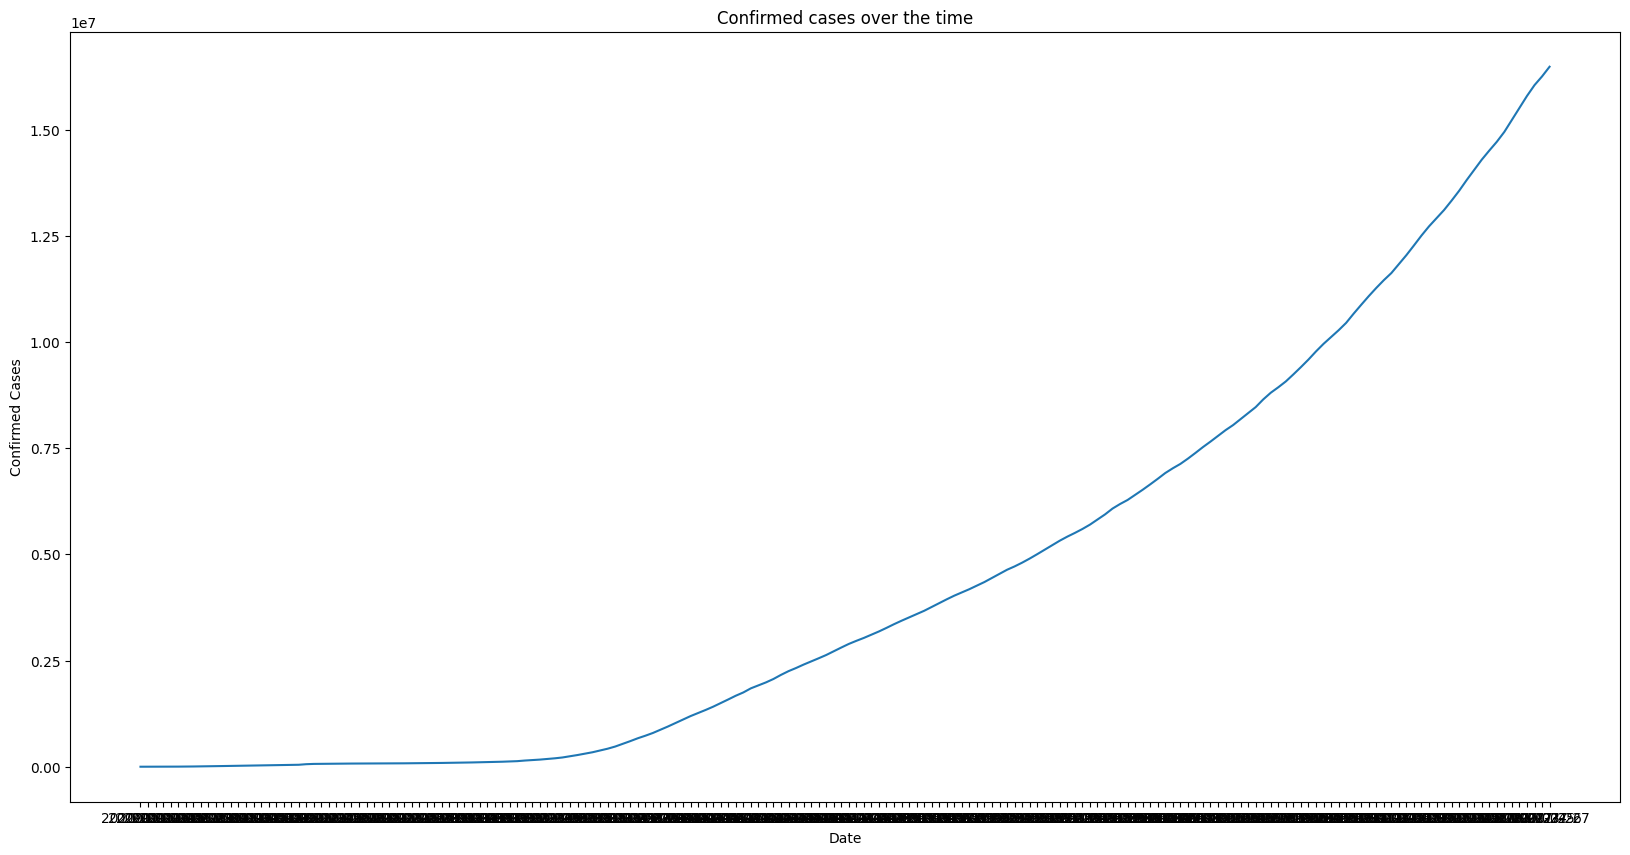

In [13]:
# Create a figure with a specified size for the plot
plt.figure(figsize=(20,10))
# Generate a line plot of 'Confirmed' cases over 'Date'
sns.lineplot(data=confirmed_cases,x='Date',y='Confirmed')
# Set the title of the plot
plt.title('Confirmed cases over the time')
# Set the label for the x-axis
plt.xlabel('Date')
# Set the label for the y-axis
plt.ylabel('Confirmed Cases')
# Display the plot
plt.show()

In [14]:
# Group the DataFrame by 'Date' and calculate the sum of 'Active' cases for each date
Active_cases=df.groupby(['Date'])['Active'].sum().reset_index()

In [15]:
# Display the total active cases per date
Active_cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [16]:
# Group the DataFrame by 'Date' and calculate the sum of 'Recovered' cases for each date
Recovered_cases=df.groupby(['Date'])['Recovered'].sum().reset_index()

In [17]:
# Display the total recovered cases per date
Recovered_cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [18]:
# Group the DataFrame by 'Date' and calculate the sum of 'Deaths' for each date
Death_cases=df.groupby(['Date'])['Deaths'].sum().reset_index()

In [19]:
# Display the total death cases per date
Death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [20]:
# Time Series : Line Plot

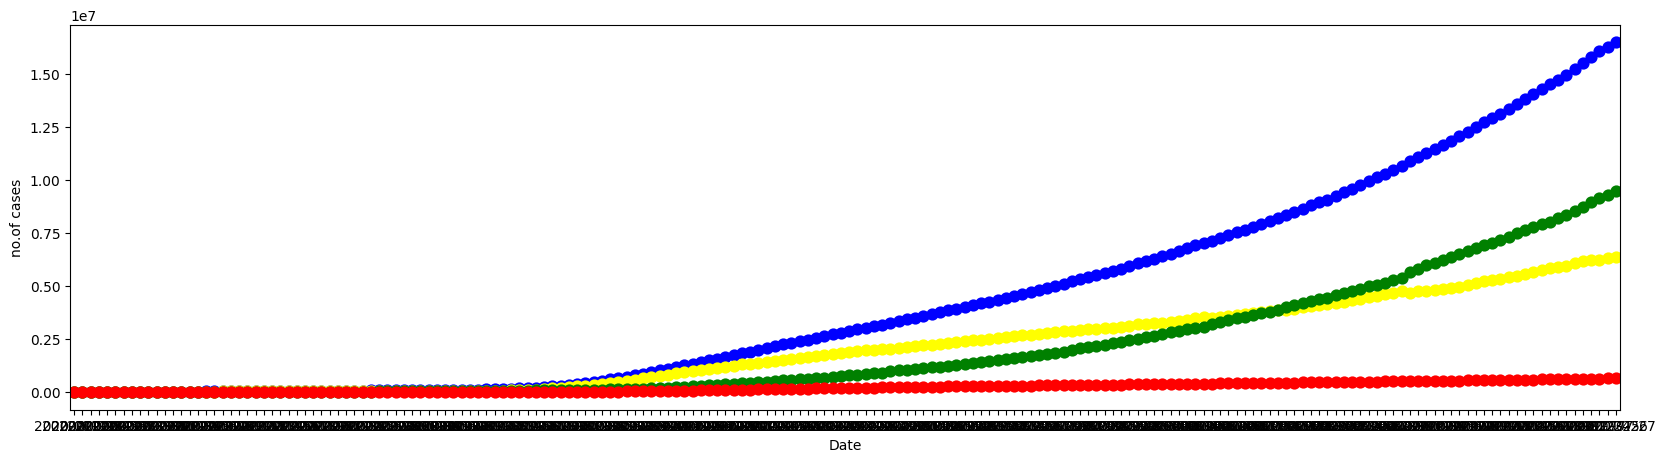

In [21]:
# Create a figure with a specified size for the plot
plt.figure(figsize=(20,5))
# Generate a point plot for Confirmed cases over Date
sns.pointplot(data=confirmed_cases,x='Date',y='Confirmed',color='Blue')
# Generate a point plot for Active cases over Date
sns.pointplot(data=Active_cases,x='Date',y='Active',color='Yellow')
# Generate a point plot for Recovered cases over Date
sns.pointplot(data=Recovered_cases,x='Date',y='Recovered',color='Green')
# Generate a point plot for Death cases over Date
sns.pointplot(data=Death_cases,x='Date',y='Deaths',color='Red')
# Set the label for the x-axis
plt.xlabel('Date')
# Set the label for the y-axis
plt.ylabel('no.of cases')
# Display the plot
plt.show()


#Top 3 countries
# 1.US
# 2.china
# 3.india

In [22]:
# Filter the main DataFrame to get data specifically for the 'US'
df_us=df[df['Country']=='US']
# Display the US-specific DataFrame
df_us

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [23]:
# Select relevant columns ('Date', 'Confirmed', 'Deaths', 'Recovered', 'Active') for the US data
df_us=df_us[['Date','Confirmed', 'Deaths', 'Recovered', 'Active']]

In [24]:
# Display the processed US data
df_us

,Date,Confirmed,Deaths,Recovered,Active
223,2020-01-22,1,0,0,1
484,2020-01-23,1,0,0,1
745,2020-01-24,2,0,0,2
1006,2020-01-25,2,0,0,2
1267,2020-01-26,5,0,0,5
...,...,...,...,...,...
47986,2020-07-23,4038816,144430,1233269,2661117
48247,2020-07-24,4112531,145560,1261624,2705347
48508,2020-07-25,4178970,146465,1279414,2753091
48769,2020-07-26,4233923,146935,1297863,2789125


In [25]:
# Filter the main DataFrame to get data specifically for 'China'
df_China=df[df['Country']=='China']
# Display the China-specific DataFrame
df_China

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [26]:
# Select relevant columns ('Date', 'Confirmed', 'Deaths', 'Recovered', 'Active') for the China data and reset the index
df_China=df_China[['Date','Confirmed', 'Deaths', 'Recovered', 'Active']].reset_index()
# Display the processed China data
df_China

,index,Date,Confirmed,Deaths,Recovered,Active
0,48,2020-01-22,1,0,0,1
1,49,2020-01-22,14,0,0,14
2,50,2020-01-22,6,0,0,6
3,51,2020-01-22,1,0,0,1
4,52,2020-01-22,0,0,0,0
...,...,...,...,...,...,...
6199,48883,2020-07-27,204,3,195,6
6200,48884,2020-07-27,1,0,1,0
6201,48885,2020-07-27,311,3,73,235
6202,48886,2020-07-27,190,2,186,2


In [27]:
# Filter the main DataFrame to get data specifically for 'India'
df_India=df[df['Country']=='India']
# Display the India-specific DataFrame
df_India

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [28]:
# Group the India DataFrame by 'Date' and sum the 'Confirmed', 'Deaths', 'Recovered', and 'Active' cases
df_India=df_India.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
# Display the processed India data
df_India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


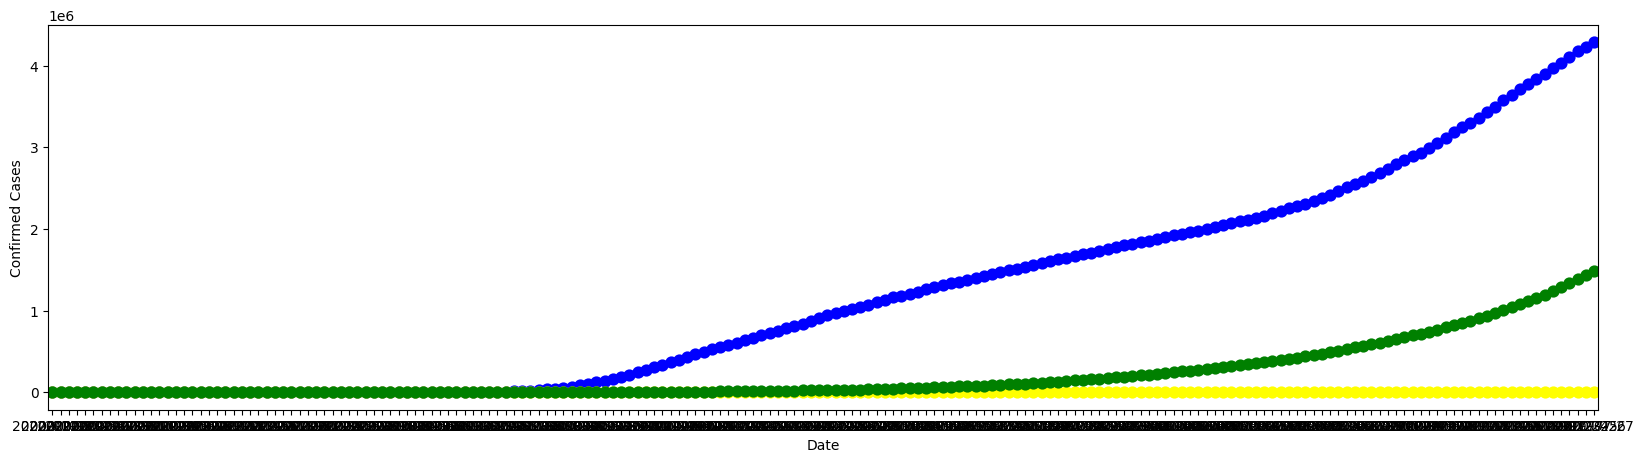

In [29]:
# Create a figure with a specified size for the plot
plt.figure(figsize=(20,5))
# Generate a point plot for Confirmed cases in US over Date
sns.pointplot(data=df_us,x='Date',y='Confirmed',color='Blue', label='US')
# Generate a point plot for Confirmed cases in China over Date
sns.pointplot(data=df_China,x='Date',y='Confirmed',color='Yellow', label='China')
# Generate a point plot for Confirmed cases in India over Date
sns.pointplot(data=df_India,x='Date',y='Confirmed',color='Green', label='India')
# Set the label for the x-axis
plt.xlabel('Date')
# Set the label for the y-axis
plt.ylabel('Confirmed Cases')
# Add a legend to distinguish between countries
plt.legend(['US', 'China', 'India'])
# Display the plot
plt.show()

In [30]:
# Install the Prophet library for time series forecasting
!pip install Prophet

In [31]:
# Upgrade Prophet and cmdstanpy to ensure the latest versions and compatibility
!pip install --upgrade prophet cmdstanpy  #stan_backend'

In [32]:
# Import the Prophet class from the prophet library
from prophet import Prophet

In [33]:
# Initialize a new Prophet model instance
model=Prophet()

In [34]:
# Prophet requires columns to be named 'ds' (datestamp) and 'y' (value)
# Rename 'Date' to 'ds' and 'Confirmed' to 'y' in the confirmed_cases DataFrame
confirmed_cases.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
# Display the updated DataFrame
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [35]:
# Fit the Prophet model to the confirmed_cases data
# The model will learn patterns and trends from the historical data
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# Create a future DataFrame for making predictions.
# 'periods=7' means it will generate future dates for the next 7 days after the last date in the training data.
future=model.make_future_dataframe(periods=7)

In [37]:
# Display the generated future DataFrame
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [38]:
# Use the fitted Prophet model to make predictions on the future DataFrame
# This will generate forecasted values along with uncertainty intervals
forcasted=model.predict(future)

In [39]:
# Display the DataFrame containing the forecasted values
forcasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613288e+03,-1.152514e+05,8.822844e+04,-9.613288e+03,-9.613288e+03,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,0.0,0.0,0.0,-2.067685e+04
1,2020-01-23,-6.933409e+03,-1.080527e+05,9.773079e+04,-6.933409e+03,-6.933409e+03,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,-8.050953e+03
2,2020-01-24,-4.253530e+03,-9.932902e+04,1.111585e+05,-4.253530e+03,-4.253530e+03,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,5.827449e+03
3,2020-01-25,-1.573651e+03,-9.719491e+04,1.172548e+05,-1.573651e+03,-1.573651e+03,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106228e+03,-9.216935e+04,1.115225e+05,1.106228e+03,1.106228e+03,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.662832e+07,1.685302e+07,1.673862e+07,1.675093e+07,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,1.674392e+07
191,2020-07-31,1.694902e+07,1.684283e+07,1.707575e+07,1.693571e+07,1.696032e+07,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,1.695911e+07
192,2020-08-01,1.715301e+07,1.706128e+07,1.727453e+07,1.713235e+07,1.717209e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.716677e+07
193,2020-08-02,1.735701e+07,1.724612e+07,1.747589e+07,1.732592e+07,1.738479e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.736430e+07


In [40]:
# Display the last 7 rows of the forecasted DataFrame, showing the date, lower bound, upper bound, and predicted value
forcasted[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(7)

,ds,yhat_lower,yhat_upper,yhat
188,2020-07-28,1.621558e+07,1.641808e+07,1.632021e+07
189,2020-07-29,1.642225e+07,1.664044e+07,1.652998e+07
190,2020-07-30,1.662832e+07,1.685302e+07,1.674392e+07
191,2020-07-31,1.684283e+07,1.707575e+07,1.695911e+07
192,2020-08-01,1.706128e+07,1.727453e+07,1.716677e+07
193,2020-08-02,1.724612e+07,1.747589e+07,1.736430e+07
194,2020-08-03,1.743562e+07,1.768289e+07,1.755889e+07


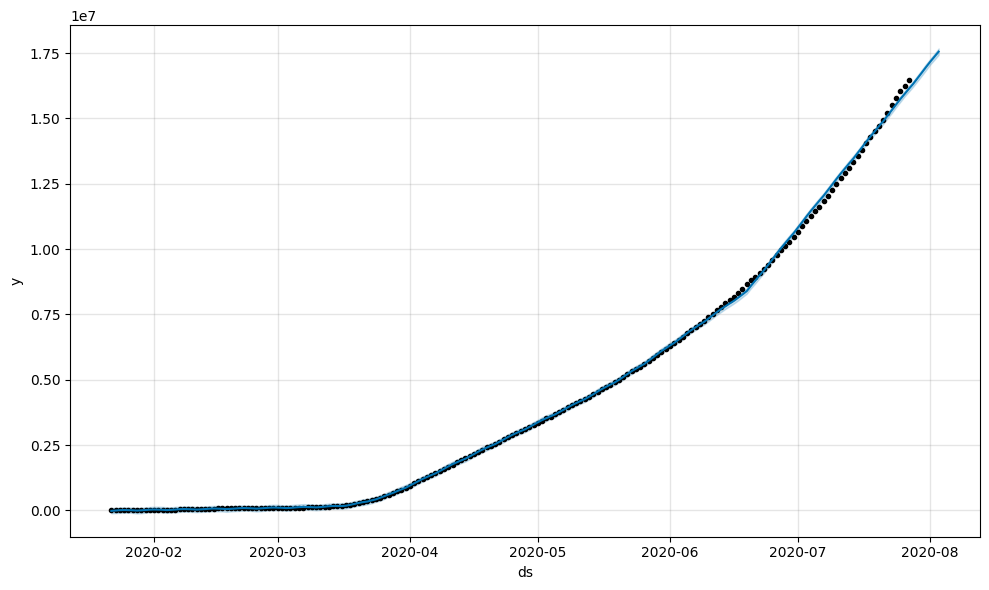

In [41]:
# Plot the forecast using the Prophet model's built-in plotting function
# This visualizes the historical data, the forecast, and the uncertainty intervals
model.plot(forcasted)
# Display the plot
plt.show()

In [42]:
# Disadv
#Control --> LSTM --> Long Short term Memory -> total control

In [43]:
# Import the plotly library for interactive visualizations
import plotly

In [44]:
# Import plotly.express for simplified plotting of various chart types
import plotly.express as px

In [45]:
# Chorelopth --. plot a world map
# Group the DataFrame by 'Country' and sum the 'Confirmed', 'Deaths', 'Recovered', and 'Active' cases for world map visualization
world=df.groupby(['Country'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
# Display the grouped world data
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [46]:
# Create an interactive choropleth map using Plotly Express
# The map visualizes 'Confirmed' COVID-19 cases across different countries
figure=px.choropleth(world,
                     locations='Country',
                     locationmode='country names',
                     color='Confirmed',
                     hover_name='Country',
                     range_color=[1,100000],
                     color_continuous_scale='reds',
                     title="World Map for confirmed Covid 19")
# Display the generated choropleth map
figure.show()